In [1]:
#Capstone Two: modeling
#Created on October 20, 2022

In [2]:
#Import necessary packages
import pandas as pd
pd.options.display.max_columns=10000
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#create an empty list of results
allresults = []

In [4]:
#Import and view train data set using read_csv
df = pd.read_csv('../data/clean_train.csv')
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,None,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,None,None,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,None,None,None,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,None,None,None,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,None,None,None,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,1456,60,RL,62.0,7917,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,None,None,None,0,8,2007,WD,Normal,175000
1455,1457,20,RL,85.0,13175,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,None,MnPrv,None,0,2,2010,WD,Normal,210000
1456,1458,70,RL,66.0,9042,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,None,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1457,1459,20,RL,68.0,9717,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,T

In [5]:
#use pd.get_dummies on data frame to create unique columns for each categorical result
df = pd.get_dummies(df)

In [6]:
#view data set
df

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_None,Alley_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_NoSeWa,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_None,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_None,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Ex,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,Gar

In [7]:
#view shape
df.shape

(1459, 401)

In [8]:
#Look at the data summary
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_None,Alley_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_NoSeWa,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_None,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_None,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Ex,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,Gar

In [9]:
#import test csv to and view test data set
test = pd.read_csv("../data/clean_test.csv")
test 

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,None,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,None,MnPrv,None,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,None,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,None,None,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,None,MnPrv,None,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,None,None,None,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,None,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,None,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,None,None,None,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,Gd,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,None,None,None,None,0.0,0.0,None,None,Y,0,0,0,0,0,0,None,None,None,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,None,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,0,None,None,None,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,GasA,Ex,Y,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,TA,7,Typ,1,TA,Detchd,1960.0,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,0,0,None,None,None,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,N

In [10]:
#replace 'LotFrontage' 'None' values with integer 0
test['LotFrontage'] = test['LotFrontage'].replace('None', int(0))

In [11]:
#change 'LotFrontage' type to float before changing to integer
test['LotFrontage'] = test['LotFrontage'].astype(float)

In [12]:
#use pd.get_dummies on data frame to create unique columns for each categorical result
test = pd.get_dummies(test)

In [13]:
test

Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  \
0     1461          20         80.0    11622            5            6   
1     1462          20         81.0    14267            6            6   
2     1463          60         74.0    13830            5            5   
3     1464          60         78.0     9978            6            6   
4     1465         120         43.0     5005            8            5   
...    ...         ...          ...      ...          ...          ...   
1454  2915         160         21.0     1936            4            7   
1455  2916         160         21.0     1894            4            5   
1456  2917          20        160.0    20000            5            7   
1457  2918          85         62.0    10441            5            5   
1458  2919          60         74.0     9627            7            5   

      YearBuilt  YearRemodAdd  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  \
0          1961          1961      270.0        882.0       896         0   
1          1958          1958      406.0       1329.0      1329         0   
2          1997          1998      137.0        928.0       928       701   
3          1998          1998      324.0        926.0       926       678   
4          1992          1992     1017.0       1280.0      1280         0   
...         ...           ...        ...          ...       ...       ...   
1454       1970          1970      546.0        546.0       546       546   
1455       1970          1970      294.0        546.0       546       546   
1456       1960          1996        0.0       1224.0      1224         0   
1457       1992          1992      575.0        912.0       970         0   
1458       1993          1994      238.0        996.0       996      1004   

      LowQualFinSF  GrLivArea  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0                0        896         1         0             2             1   
1                0       1329         1         1             3             1   
2                0       1629         2         1             3             1   
3                0       1604         2         1             3             1   
4                0       1280         2         0             2             1   
...            ...        ...       ...       ...           ...           ...   
1454             0       1092         1         1             3             1   
1455             0       1092         1         1             3             1   
1456             0       1224         1         0             4             1   
1457             0        970         1         0             3             1   
1458             0       2000         2         1             3             1   

      TotRmsAbvGrd  Fireplaces  GarageCars  GarageArea  WoodDeckSF  \
0                5           0         1.0       730.0         140   
1                6           0         1.0       312.0         393   
2                6           1         2.0       482.0         212   
3                7           1         2.0       470.0         360   
4                5           0         2.0       506.0           0   
...            ...         ...         ...         ...         ...   
1454             5           0         0.0         0.0           0   
1455             6           0         1.0       286.0           0   
1456             7           1         2.0       576.0         474   
1457             6           0         0.0         0.0          80   
1458             9           1         3.0       650.0         190   

      OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  \
0               0              0          0          120         0        0   
1              36              0          0            0         0    12500   
2              34              0          0            0         0        0   
3              36              0          0            0        

In [14]:
#Import LinearRegression model from sklearn.linear_model
from sklearn.linear_model import LinearRegression

In [15]:
help(LinearRegression)

Help on class LinearRegression in module sklearn.linear_model._base:

class LinearRegression(sklearn.base.MultiOutputMixin, sklearn.base.RegressorMixin, LinearModel)
 |  LinearRegression(*, fit_intercept=True, normalize='deprecated', copy_X=True, n_jobs=None, positive=False)
 |  
 |  Ordinary least squares Linear Regression.
 |  
 |  LinearRegression fits a linear model with coefficients w = (w1, ..., wp)
 |  to minimize the residual sum of squares between the observed targets in
 |  the dataset, and the targets predicted by the linear approximation.
 |  
 |  Parameters
 |  ----------
 |  fit_intercept : bool, default=True
 |      Whether to calculate the intercept for this model. If set
 |      to False, no intercept will be used in calculations
 |      (i.e. data is expected to be centered).
 |  
 |  normalize : bool, default=False
 |      This parameter is ignored when ``fit_intercept`` is set to False.
 |      If True, the regressors X will be normalized before regression by
 |    

In [16]:
print(LinearRegression.__doc__)


    Ordinary least squares Linear Regression.

    LinearRegression fits a linear model with coefficients w = (w1, ..., wp)
    to minimize the residual sum of squares between the observed targets in
    the dataset, and the targets predicted by the linear approximation.

    Parameters
    ----------
    fit_intercept : bool, default=True
        Whether to calculate the intercept for this model. If set
        to False, no intercept will be used in calculations
        (i.e. data is expected to be centered).

    normalize : bool, default=False
        This parameter is ignored when ``fit_intercept`` is set to False.
        If True, the regressors X will be normalized before regression by
        subtracting the mean and dividing by the l2-norm.
        If you wish to standardize, please use
        :class:`~sklearn.preprocessing.StandardScaler` before calling ``fit``
        on an estimator with ``normalize=False``.

        .. deprecated:: 1.0
           `normalize` was deprecate

In [17]:
#create an empty list of featurenames
featurenames = []

In [18]:
#assign "LotArea" to variable
featurename = 'LotArea'
df[featurename] = df['LotArea']

In [19]:
#append feature name to list of featurenames
#use same block of code for all Linear Regression models
#calculate train and test RMSE
#create a data frame of all results
featurenames += [featurename]
X=df[featurenames]
y=df['SalePrice']
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)
e = y_pred-y
RMSE = np.sqrt(np.mean((e)**2))
y_pred2 = model.predict(test[featurenames])
e2 = y_pred2-y
RMSE2 = np.sqrt(np.mean((e2)**2))
results = dict(RMSE=RMSE, RMSEtest=RMSE2, featurenames=",".join(featurenames), model=model.__class__.__name__)
allresults += [results]
pd.DataFrame(allresults)

,RMSE,RMSEtest,featurenames,model
0,76546.713815,79919.0586,LotArea,LinearRegression


Text(0, 0.5, 'Actual price')

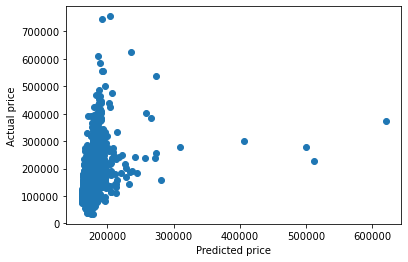

In [20]:
#Plot the predicted Sale Price with actual sale prices
plt.scatter(y_pred, df['SalePrice'])
plt.xlabel('Predicted price')
plt.ylabel('Actual price')

Text(0, 0.5, 'Actual price')

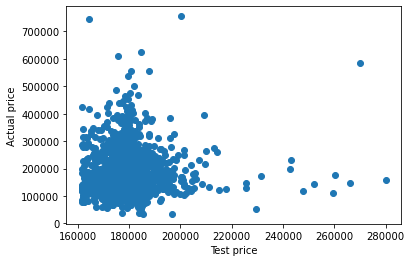

In [21]:
#Plot the test Sale Price with actual sale prices
plt.scatter(y_pred2, df['SalePrice'])
plt.xlabel('Test price')
plt.ylabel('Actual price')

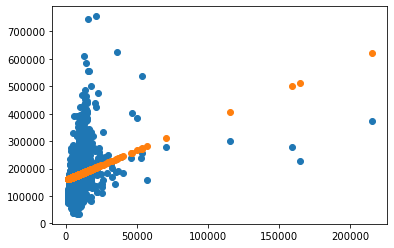

In [22]:
#Plot Lot Area and Sale price
#Add the line of fit
plt.scatter(df['LotArea'], df['SalePrice'])
plt.scatter(df['LotArea'], y_pred) 

{'RMSE': 76546.71381485718, 'RMSEtest': 79919.05860018599, 'featurenames': 'LotArea', 'model': 'LinearRegression'}


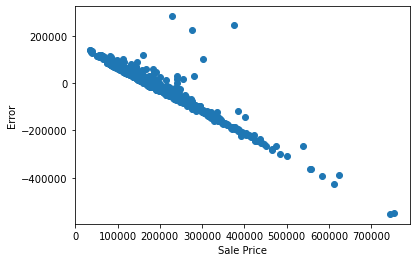

In [23]:
#Plot the Sale price against the error
plt.scatter(df['SalePrice'], e)
plt.xlabel('Sale Price')
plt.ylabel('Error')
print(allresults[0])

Text(0, 0.5, 'Error')

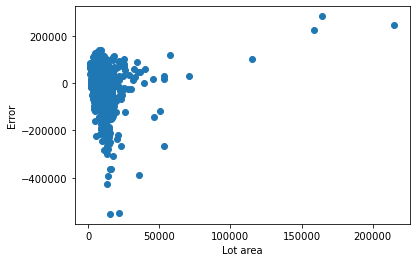

In [24]:
#Plot the Lot Area against the error and label axes
plt.scatter(df['LotArea'], e) #residual
plt.xlabel('Lot area')
plt.ylabel('Error')
#Larger homes are underestimated on Sale price

In [25]:
#calculate the square of 'LotArea' and assign it to a new column "LotArea_squared"
df['LotArea_squared'] = df['LotArea'] ** 2

In [26]:
#view data frame
df

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_None,Alley_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_NoSeWa,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_None,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_None,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Ex,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,Gar

In [27]:
#assign 'LotArea_squared' values to df[featurename] in train data set
featurename = 'LotArea_squared'
df[featurename] = df['LotArea_squared']

In [28]:
#assign 'LotArea_squared' values to df[featurename] in test data set
test[featurename] = test['LotArea'] ** 2

In [29]:
#append feature name to list of featurenames
#use same block of code for all Linear Regression models
#calculate train and test RMSE
#add these results to all results data frame
featurenames += [featurename]
X=df[featurenames]
y=df['SalePrice']
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)
e = y_pred-y
RMSE = np.sqrt(np.mean((e)**2))
y_pred2 = model.predict(test[featurenames])
e2 = y_pred2-y
RMSE2 = np.sqrt(np.mean((e2)**2))
results = dict(RMSE=RMSE, RMSEtest=RMSE2, featurenames=",".join(featurenames), model=model.__class__.__name__)
allresults += [results]
pd.DataFrame(allresults)

,RMSE,RMSEtest,featurenames,model
0,76546.713815,79919.058600,LotArea,LinearRegression
1,73569.131484,83162.654656,"LotArea,LotArea_squared",LinearRegression


Text(0, 0.5, 'Error')

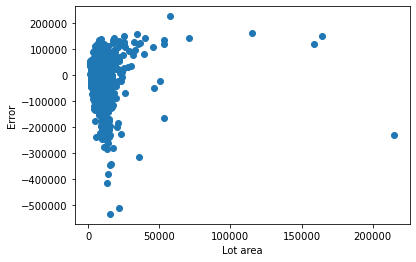

In [30]:
#plot Lot area against error
plt.scatter(df['LotArea'], e) #residual
plt.xlabel('Lot area')
plt.ylabel('Error')

Text(0, 0.5, 'Actual price')

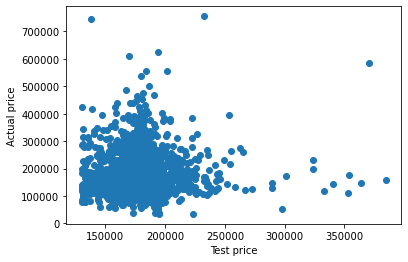

In [31]:
#Plot the test Sale Price with actual sale prices
plt.scatter(y_pred2, df['SalePrice'])
plt.xlabel('Test price')
plt.ylabel('Actual price')

In [32]:
#create a threshold of Lot area less than 50000 for train data set
featurename = 'LotArea_lt_50000'
df[featurename] = df['LotArea'] < 50000

In [33]:
#create a threshold of Lot area less than 50000 for test data set
test[featurename] = test['LotArea'] < 500000

In [34]:
#append feature name to list of featurenames
#use same block of code for all Linear Regression models
#calculate train and test RMSE
#add these results to all results data frame
featurenames += [featurename]
X=df[featurenames]
y=df['SalePrice']
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)
RMSE = np.sqrt(np.mean((y_pred-y)**2))
y_pred2 = model.predict(test[featurenames])
e2 = y_pred2-y
RMSE2 = np.sqrt(np.mean((e2)**2))
results = dict(RMSE=RMSE, RMSEtest=RMSE2, featurenames=",".join(featurenames), model=model.__class__.__name__)
allresults += [results]
pd.DataFrame(allresults)

,RMSE,RMSEtest,featurenames,model
0,76546.713815,79919.058600,LotArea,LinearRegression
1,73569.131484,83162.654656,"LotArea,LotArea_squared",LinearRegression
2,73139.716444,84518.980832,"LotArea,LotArea_squared,LotArea_lt_50000",LinearRegression


<AxesSubplot:xlabel='LotArea', ylabel='SalePrice'>

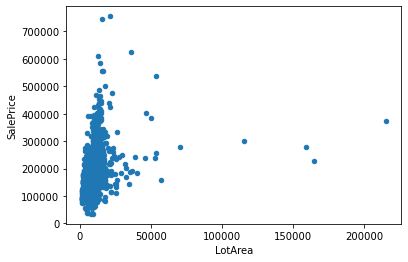

In [35]:
#Plot LotArea and Sale Price
df.plot(kind='scatter', x='LotArea', y='SalePrice')

In [36]:
#use 'LotFrontage' as next feature name in train set
featurename = 'LotFrontage'
df[featurename] = df['LotFrontage']

In [37]:
#use 'LotFrontage' as next feature name in test set
test[featurename] = test['LotFrontage']

In [38]:
#append feature name to list of featurenames
#use same block of code for all Linear Regression models
#calculate train and test RMSE
#add these results to all results data frame
featurenames += [featurename]
X=df[featurenames]
y=df['SalePrice']
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)
RMSE = np.sqrt(np.mean((y_pred-y)**2))
y_pred2 = model.predict(test[featurenames])
e2 = y_pred2-y
RMSE2 = np.sqrt(np.mean((e2)**2))
results = dict(RMSE=RMSE, RMSEtest=RMSE2, featurenames=",".join(featurenames), model=model.__class__.__name__)
allresults += [results]
pd.DataFrame(allresults)

,RMSE,RMSEtest,featurenames,model
0,76546.713815,79919.058600,LotArea,LinearRegression
1,73569.131484,83162.654656,"LotArea,LotArea_squared",LinearRegression
2,73139.716444,84518.980832,"LotArea,LotArea_squared,LotArea_lt_50000",LinearRegression
3,72169.128354,85714.533862,"LotArea,LotArea_squared,LotArea_lt_50000,LotFr...",LinearRegression


Text(0, 0.5, 'Error')

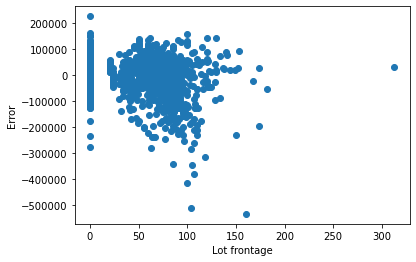

In [39]:
#plot LotFrontage against error
plt.scatter(df['LotFrontage'], e) #residual
plt.xlabel('Lot frontage')
plt.ylabel('Error')

In [40]:
from sklearn.ensemble import RandomForestClassifier

In [41]:
#use same block of code for all RandomForest models
#calculate train and test RMSE using the same features used for previous LinearRegression model
#add these results to all results data frame
X=df[featurenames]
y=df['SalePrice']
model = RandomForestClassifier()
model.fit(X, y)
y_pred = model.predict(X)
RMSE = np.sqrt(np.mean((y_pred-y)**2))
y_pred2 = model.predict(test[featurenames])
e2 = y_pred2-y
RMSE2 = np.sqrt(np.mean((e2)**2))
results = dict(RMSE=RMSE, RMSEtest=RMSE2, featurenames=",".join(featurenames), model=model.__class__.__name__)
allresults += [results]
pd.DataFrame(allresults)

,RMSE,RMSEtest,featurenames,model
0,76546.713815,79919.058600,LotArea,LinearRegression
1,73569.131484,83162.654656,"LotArea,LotArea_squared",LinearRegression
2,73139.716444,84518.980832,"LotArea,LotArea_squared,LotArea_lt_50000",LinearRegression
3,72169.128354,85714.533862,"LotArea,LotArea_squared,LotArea_lt_50000,LotFr...",LinearRegression
4,22139.136358,110598.097811,"LotArea,LotArea_squared,LotArea_lt_50000,LotFr...",RandomForestClassifier


Text(0, 0.5, 'Actual price')

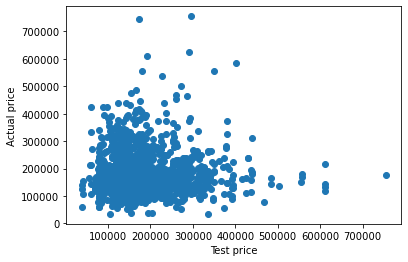

In [42]:
#Plot the test Sale Price with actual sale prices
plt.scatter(y_pred2, df['SalePrice'])
plt.xlabel('Test price')
plt.ylabel('Actual price')

In [43]:
#add TotalBsmtSF to feature name for train set
featurename = 'TotalBsmtSF'
df[featurename] = df['TotalBsmtSF']

In [44]:
#add TotalBsmtSF to feature name for test set
test[featurename] = test['TotalBsmtSF']

In [45]:
#append feature name to list of featurenames
#Add this feature to the Linear Regression model
#calculate train and test RMSE
#add these results to all results data frame
featurenames += [featurename]
X=df[featurenames]
y=df['SalePrice']
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)
RMSE = np.sqrt(np.mean((y_pred-y)**2))
y_pred2 = model.predict(test[featurenames])
e2 = y_pred2-y
RMSE2 = np.sqrt(np.mean((e2)**2))
results = dict(RMSE=RMSE, RMSEtest=RMSE2, featurenames=",".join(featurenames), model=model.__class__.__name__)
allresults += [results]
pd.DataFrame(allresults)

,RMSE,RMSEtest,featurenames,model
0,76546.713815,79919.058600,LotArea,LinearRegression
1,73569.131484,83162.654656,"LotArea,LotArea_squared",LinearRegression
2,73139.716444,84518.980832,"LotArea,LotArea_squared,LotArea_lt_50000",LinearRegression
3,72169.128354,85714.533862,"LotArea,LotArea_squared,LotArea_lt_50000,LotFr...",LinearRegression
4,22139.136358,110598.097811,"LotArea,LotArea_squared,LotArea_lt_50000,LotFr...",RandomForestClassifier
5,58458.307791,95317.217699,"LotArea,LotArea_squared,LotArea_lt_50000,LotFr...",LinearRegression


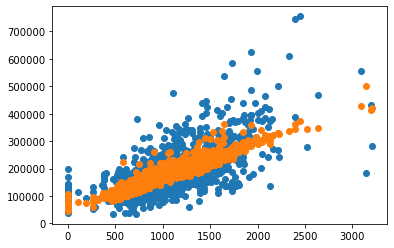

In [46]:
#Plot TotalBsmtSF and Sale price
#Add the line of fit
plt.scatter(df['TotalBsmtSF'], df['SalePrice'])
plt.scatter(df['TotalBsmtSF'], y_pred)

In [47]:
#add TotalBsmtSF less than 2000 to feature name for train set
featurename = 'TotalBsmtSF_lt_1500'
df[featurename] = df['TotalBsmtSF'] < 1500

In [48]:
#add TotalBsmtSF less than 2000 to feature name for test set
test[featurename] = test['TotalBsmtSF'] < 1500

In [49]:
#append feature name to list of featurenames
#Add this feature to the Linear Regression model
#calculate train and test RMSE
#add these results to all results data frame
featurenames += [featurename]
X=df[featurenames]
y=df['SalePrice']
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)
RMSE = np.sqrt(np.mean((y_pred-y)**2))
y_pred2 = model.predict(test[featurenames])
e2 = y_pred2-y
RMSE2 = np.sqrt(np.mean((e2)**2))
results = dict(RMSE=RMSE, RMSEtest=RMSE2, featurenames=",".join(featurenames), model=model.__class__.__name__)
allresults += [results]
pd.DataFrame(allresults)

,RMSE,RMSEtest,featurenames,model
0,76546.713815,79919.058600,LotArea,LinearRegression
1,73569.131484,83162.654656,"LotArea,LotArea_squared",LinearRegression
2,73139.716444,84518.980832,"LotArea,LotArea_squared,LotArea_lt_50000",LinearRegression
3,72169.128354,85714.533862,"LotArea,LotArea_squared,LotArea_lt_50000,LotFr...",LinearRegression
4,22139.136358,110598.097811,"LotArea,LotArea_squared,LotArea_lt_50000,LotFr...",RandomForestClassifier
5,58458.307791,95317.217699,"LotArea,LotArea_squared,LotArea_lt_50000,LotFr...",LinearRegression
6,57905.012576,95530.033098,"LotArea,LotArea_squared,LotArea_lt_50000,LotFr...",LinearRegression


In [50]:
#add YearBuilt to feature name for train set
featurename = 'YearBuilt'
df[featurename] = df['YearBuilt'] 

In [51]:
#add YearBuilt to feature name for test set
test[featurename] = test['YearBuilt']

In [52]:
#append feature name to list of featurenames
#Add this feature to the Linear Regression model
#calculate train and test RMSE
#add these results to all results data frame
featurenames += [featurename]
X=df[featurenames]
y=df['SalePrice']
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)
RMSE = np.sqrt(np.mean((y_pred-y)**2))
y_pred2 = model.predict(test[featurenames])
e2 = y_pred2-y
RMSE2 = np.sqrt(np.mean((e2)**2))
results = dict(RMSE=RMSE, RMSEtest=RMSE2, featurenames=",".join(featurenames), model=model.__class__.__name__)
allresults += [results]
pd.DataFrame(allresults)

,RMSE,RMSEtest,featurenames,model
0,76546.713815,79919.058600,LotArea,LinearRegression
1,73569.131484,83162.654656,"LotArea,LotArea_squared",LinearRegression
2,73139.716444,84518.980832,"LotArea,LotArea_squared,LotArea_lt_50000",LinearRegression
3,72169.128354,85714.533862,"LotArea,LotArea_squared,LotArea_lt_50000,LotFr...",LinearRegression
4,22139.136358,110598.097811,"LotArea,LotArea_squared,LotArea_lt_50000,LotFr...",RandomForestClassifier
5,58458.307791,95317.217699,"LotArea,LotArea_squared,LotArea_lt_50000,LotFr...",LinearRegression
6,57905.012576,95530.033098,"LotArea,LotArea_squared,LotArea_lt_50000,LotFr...",LinearRegression
7,52385.063136,98331.437933,"LotArea,LotArea_squared,LotArea_lt_50000,LotFr...",LinearRegression


In [53]:
#add OverallQual to feature name for train set
featurename = 'OverallQual'
df[featurename] = df['OverallQual'] 

In [54]:
#add OverallQual to feature name for test set
test[featurename] = test['OverallQual']

In [55]:
#append feature name to list of featurenames
#Add this feature to the Linear Regression model
#calculate train and test RMSE
#add these results to all results data frame
featurenames += [featurename]
X=df[featurenames]
y=df['SalePrice']
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)
RMSE = np.sqrt(np.mean((y_pred-y)**2))
y_pred2 = model.predict(test[featurenames])
e2 = y_pred2-y
RMSE2 = np.sqrt(np.mean((e2)**2))
results = dict(RMSE=RMSE, RMSEtest=RMSE2, featurenames=",".join(featurenames), model=model.__class__.__name__)
allresults += [results]
pd.DataFrame(allresults)

,RMSE,RMSEtest,featurenames,model
0,76546.713815,79919.058600,LotArea,LinearRegression
1,73569.131484,83162.654656,"LotArea,LotArea_squared",LinearRegression
2,73139.716444,84518.980832,"LotArea,LotArea_squared,LotArea_lt_50000",LinearRegression
3,72169.128354,85714.533862,"LotArea,LotArea_squared,LotArea_lt_50000,LotFr...",LinearRegression
4,22139.136358,110598.097811,"LotArea,LotArea_squared,LotArea_lt_50000,LotFr...",RandomForestClassifier
5,58458.307791,95317.217699,"LotArea,LotArea_squared,LotArea_lt_50000,LotFr...",LinearRegression
6,57905.012576,95530.033098,"LotArea,LotArea_squared,LotArea_lt_50000,LotFr...",LinearRegression
7,52385.063136,98331.437933,"LotArea,LotArea_squared,LotArea_lt_50000,LotFr...",LinearRegression
8,40357.351175,105123.927301,"LotArea,LotArea_squared,LotArea_lt_50000,LotFr...",LinearRegression


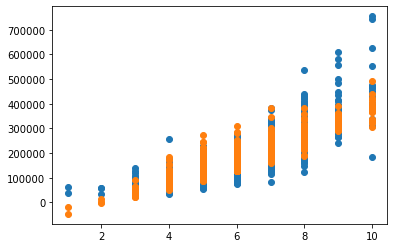

In [56]:
#Plot TotalBsmtSF and Sale price
#Add the line of fit
plt.scatter(df['OverallQual'], df['SalePrice'])
plt.scatter(df['OverallQual'], y_pred)

In [57]:
#run another RandomForestClassifier model using the same featurenames used previously
#calculate train and test RMSE 
#add these results to all results data frame
X=df[featurenames]
y=df['SalePrice']
model = RandomForestClassifier()
model.fit(X, y)
y_pred = model.predict(X)
RMSE = np.sqrt(np.mean((y_pred-y)**2))
y_pred2 = model.predict(test[featurenames])
e2 = y_pred2-y
RMSE2 = np.sqrt(np.mean((e2)**2))
results = dict(RMSE=RMSE, RMSEtest=RMSE2, featurenames=",".join(featurenames), model=model.__class__.__name__)
allresults += [results]
pd.DataFrame(allresults)

,RMSE,RMSEtest,featurenames,model
0,76546.713815,79919.058600,LotArea,LinearRegression
1,73569.131484,83162.654656,"LotArea,LotArea_squared",LinearRegression
2,73139.716444,84518.980832,"LotArea,LotArea_squared,LotArea_lt_50000",LinearRegression
3,72169.128354,85714.533862,"LotArea,LotArea_squared,LotArea_lt_50000,LotFr...",LinearRegression
4,22139.136358,110598.097811,"LotArea,LotArea_squared,LotArea_lt_50000,LotFr...",RandomForestClassifier
5,58458.307791,95317.217699,"LotArea,LotArea_squared,LotArea_lt_50000,LotFr...",LinearRegression
6,57905.012576,95530.033098,"LotArea,LotArea_squared,LotArea_lt_50000,LotFr...",LinearRegression
7,52385.063136,98331.437933,"LotArea,LotArea_squared,LotArea_lt_50000,LotFr...",LinearRegression
8,40357.351175,105123.927301,"LotArea,LotArea_squared,LotArea_lt_50000,LotFr...",LinearRegression
9,1380.267967,108334.346040,"LotArea,LotArea_squared,LotArea_lt_50000,LotFr...",RandomForestClassifier


In [58]:
#add n_estimators=2 attribute for RandomForestClassifier model
#calculate train and test RMSE 
#add these results to all results data frame
model = RandomForestClassifier(n_estimators=2)
rfparams = '(n_estimators=2)'
model.fit(X, y)
y_pred = model.predict(X)
RMSE = np.sqrt(np.mean((y_pred-y)**2))
y_pred2 = model.predict(test[featurenames])
e2 = y_pred2-y
RMSE2 = np.sqrt(np.mean((e2)**2))
results = dict(RMSE=RMSE, RMSEtest=RMSE2, featurenames=",".join(featurenames), model=model.__class__.__name__, params=rfparams)
allresults += [results]
pd.DataFrame(allresults)

,RMSE,RMSEtest,featurenames,model,params
0,76546.713815,79919.058600,LotArea,LinearRegression,NaN
1,73569.131484,83162.654656,"LotArea,LotArea_squared",LinearRegression,NaN
2,73139.716444,84518.980832,"LotArea,LotArea_squared,LotArea_lt_50000",LinearRegression,NaN
3,72169.128354,85714.533862,"LotArea,LotArea_squared,LotArea_lt_50000,LotFr...",LinearRegression,NaN
4,22139.136358,110598.097811,"LotArea,LotArea_squared,LotArea_lt_50000,LotFr...",RandomForestClassifier,NaN
5,58458.307791,95317.217699,"LotArea,LotArea_squared,LotArea_lt_50000,LotFr...",LinearRegression,NaN
6,57905.012576,95530.033098,"LotArea,LotArea_squared,LotArea_lt_50000,LotFr...",LinearRegression,NaN
7,52385.063136,98331.437933,"LotArea,LotArea_squared,LotArea_lt_50000,LotFr...",LinearRegression,NaN
8,40357.351175,105123.927301,"LotArea,LotArea_squared,LotArea_lt_50000,LotFr...",LinearRegression,NaN
9,1380.267967,108334.346040,"LotArea,LotArea_squared,LotArea_lt_50000,LotFr...",RandomForestClassifier,NaN


In [59]:
#use n_jobs=5 attribute for RandomForestClassifier model
#calculate train and test RMSE 
#add these results to all results data frame
model = RandomForestClassifier(n_jobs=5)
rfparams = '(n_jobs=5)'
model.fit(X, y)
y_pred = model.predict(X)
RMSE = np.sqrt(np.mean((y_pred-y)**2))
y_pred2 = model.predict(test[featurenames])
e2 = y_pred2-y
RMSE2 = np.sqrt(np.mean((e2)**2))
results = dict(RMSE=RMSE, RMSEtest=RMSE2, featurenames=",".join(featurenames), model=model.__class__.__name__, params=rfparams)
allresults += [results]
pd.DataFrame(allresults)

,RMSE,RMSEtest,featurenames,model,params
0,76546.713815,79919.058600,LotArea,LinearRegression,NaN
1,73569.131484,83162.654656,"LotArea,LotArea_squared",LinearRegression,NaN
2,73139.716444,84518.980832,"LotArea,LotArea_squared,LotArea_lt_50000",LinearRegression,NaN
3,72169.128354,85714.533862,"LotArea,LotArea_squared,LotArea_lt_50000,LotFr...",LinearRegression,NaN
4,22139.136358,110598.097811,"LotArea,LotArea_squared,LotArea_lt_50000,LotFr...",RandomForestClassifier,NaN
5,58458.307791,95317.217699,"LotArea,LotArea_squared,LotArea_lt_50000,LotFr...",LinearRegression,NaN
6,57905.012576,95530.033098,"LotArea,LotArea_squared,LotArea_lt_50000,LotFr...",LinearRegression,NaN
7,52385.063136,98331.437933,"LotArea,LotArea_squared,LotArea_lt_50000,LotFr...",LinearRegression,NaN
8,40357.351175,105123.927301,"LotArea,LotArea_squared,LotArea_lt_50000,LotFr...",LinearRegression,NaN
9,1380.267967,108334.346040,"LotArea,LotArea_squared,LotArea_lt_50000,LotFr...",RandomForestClassifier,NaN


In [60]:
#use max_depth=5 attribute for RandomForestClassifier model
#calculate train and test RMSE 
#add these results to all results data frame
model = RandomForestClassifier(n_jobs=5)
rfparams = '(max_depth=5)'
model.fit(X, y)
y_pred = model.predict(X)
RMSE = np.sqrt(np.mean((y_pred-y)**2))
y_pred2 = model.predict(test[featurenames])
e2 = y_pred2-y
RMSE2 = np.sqrt(np.mean((e2)**2))
results = dict(RMSE=RMSE, RMSEtest=RMSE2, featurenames=",".join(featurenames), model=model.__class__.__name__, params=rfparams)
allresults += [results]
pd.DataFrame(allresults)

,RMSE,RMSEtest,featurenames,model,params
0,76546.713815,79919.058600,LotArea,LinearRegression,NaN
1,73569.131484,83162.654656,"LotArea,LotArea_squared",LinearRegression,NaN
2,73139.716444,84518.980832,"LotArea,LotArea_squared,LotArea_lt_50000",LinearRegression,NaN
3,72169.128354,85714.533862,"LotArea,LotArea_squared,LotArea_lt_50000,LotFr...",LinearRegression,NaN
4,22139.136358,110598.097811,"LotArea,LotArea_squared,LotArea_lt_50000,LotFr...",RandomForestClassifier,NaN
5,58458.307791,95317.217699,"LotArea,LotArea_squared,LotArea_lt_50000,LotFr...",LinearRegression,NaN
6,57905.012576,95530.033098,"LotArea,LotArea_squared,LotArea_lt_50000,LotFr...",LinearRegression,NaN
7,52385.063136,98331.437933,"LotArea,LotArea_squared,LotArea_lt_50000,LotFr...",LinearRegression,NaN
8,40357.351175,105123.927301,"LotArea,LotArea_squared,LotArea_lt_50000,LotFr...",LinearRegression,NaN
9,1380.267967,108334.346040,"LotArea,LotArea_squared,LotArea_lt_50000,LotFr...",RandomForestClassifier,NaN


In [61]:
#add n_jobs=5 attribute for RandomForestClassifier model
#calculate train and test RMSE 
#add these results to all results data frame
model = RandomForestClassifier(n_estimators=2, n_jobs=5)
rfparams = 'n_estimators=2', 'n_jobs=5'
model.fit(X, y)
y_pred = model.predict(X)
RMSE = np.sqrt(np.mean((y_pred-y)**2))
y_pred2 = model.predict(test[featurenames])
e2 = y_pred2-y
RMSE2 = np.sqrt(np.mean((e2)**2))
results = dict(RMSE=RMSE, RMSEtest=RMSE2, featurenames=",".join(featurenames), model=model.__class__.__name__, params=rfparams)
allresults += [results]
pd.DataFrame(allresults)

,RMSE,RMSEtest,featurenames,model,params
0,76546.713815,79919.058600,LotArea,LinearRegression,NaN
1,73569.131484,83162.654656,"LotArea,LotArea_squared",LinearRegression,NaN
2,73139.716444,84518.980832,"LotArea,LotArea_squared,LotArea_lt_50000",LinearRegression,NaN
3,72169.128354,85714.533862,"LotArea,LotArea_squared,LotArea_lt_50000,LotFr...",LinearRegression,NaN
4,22139.136358,110598.097811,"LotArea,LotArea_squared,LotArea_lt_50000,LotFr...",RandomForestClassifier,NaN
5,58458.307791,95317.217699,"LotArea,LotArea_squared,LotArea_lt_50000,LotFr...",LinearRegression,NaN
6,57905.012576,95530.033098,"LotArea,LotArea_squared,LotArea_lt_50000,LotFr...",LinearRegression,NaN
7,52385.063136,98331.437933,"LotArea,LotArea_squared,LotArea_lt_50000,LotFr...",LinearRegression,NaN
8,40357.351175,105123.927301,"LotArea,LotArea_squared,LotArea_lt_50000,LotFr...",LinearRegression,NaN
9,1380.267967,108334.346040,"LotArea,LotArea_squared,LotArea_lt_50000,LotFr...",RandomForestClassifier,NaN


In [62]:
#add max_depth=5 attribute for RandomForestClassifier model
#calculate train and test RMSE 
#add these results to all results data frame
model = RandomForestClassifier(n_estimators=2, max_depth=5)
rfparams = 'n_estimators=2', 'max_depth=5'
model.fit(X, y)
y_pred = model.predict(X)
RMSE = np.sqrt(np.mean((y_pred-y)**2))
y_pred2 = model.predict(test[featurenames])
e2 = y_pred2-y
RMSE2 = np.sqrt(np.mean((e2)**2))
results = dict(RMSE=RMSE, RMSEtest=RMSE2, featurenames=",".join(featurenames), model=model.__class__.__name__, params=rfparams)
allresults += [results]
pd.DataFrame(allresults)

,RMSE,RMSEtest,featurenames,model,params
0,76546.713815,79919.058600,LotArea,LinearRegression,NaN
1,73569.131484,83162.654656,"LotArea,LotArea_squared",LinearRegression,NaN
2,73139.716444,84518.980832,"LotArea,LotArea_squared,LotArea_lt_50000",LinearRegression,NaN
3,72169.128354,85714.533862,"LotArea,LotArea_squared,LotArea_lt_50000,LotFr...",LinearRegression,NaN
4,22139.136358,110598.097811,"LotArea,LotArea_squared,LotArea_lt_50000,LotFr...",RandomForestClassifier,NaN
5,58458.307791,95317.217699,"LotArea,LotArea_squared,LotArea_lt_50000,LotFr...",LinearRegression,NaN
6,57905.012576,95530.033098,"LotArea,LotArea_squared,LotArea_lt_50000,LotFr...",LinearRegression,NaN
7,52385.063136,98331.437933,"LotArea,LotArea_squared,LotArea_lt_50000,LotFr...",LinearRegression,NaN
8,40357.351175,105123.927301,"LotArea,LotArea_squared,LotArea_lt_50000,LotFr...",LinearRegression,NaN
9,1380.267967,108334.346040,"LotArea,LotArea_squared,LotArea_lt_50000,LotFr...",RandomForestClassifier,NaN


In [63]:
pd.set_option('display.max_colwidth', 0)

In [64]:
#add n_jobs=5 attribute for RandomForestClassifier model
#calculate train and test RMSE 
#add these results to all results data frame
model = RandomForestClassifier(n_estimators=2, max_depth=5, n_jobs=5)
rfparams = 'n_estimators=2', 'max_depth=5', 'n_jobs=5'
model.fit(X, y)
y_pred = model.predict(X)
RMSE = np.sqrt(np.mean((y_pred-y)**2))
y_pred2 = model.predict(test[featurenames])
e2 = y_pred2-y
RMSE2 = np.sqrt(np.mean((e2)**2))
results = dict(RMSE=RMSE, RMSEtest=RMSE2, featurenames=",".join(featurenames), model=model.__class__.__name__, params=rfparams)
allresults += [results]
pd.DataFrame(allresults)

,RMSE,RMSEtest,featurenames,model,params
0,76546.713815,79919.058600,LotArea,LinearRegression,NaN
1,73569.131484,83162.654656,"LotArea,LotArea_squared",LinearRegression,NaN
2,73139.716444,84518.980832,"LotArea,LotArea_squared,LotArea_lt_50000",LinearRegression,NaN
3,72169.128354,85714.533862,"LotArea,LotArea_squared,LotArea_lt_50000,LotFrontage",LinearRegression,NaN
4,22139.136358,110598.097811,"LotArea,LotArea_squared,LotArea_lt_50000,LotFrontage",RandomForestClassifier,NaN
5,58458.307791,95317.217699,"LotArea,LotArea_squared,LotArea_lt_50000,LotFrontage,TotalBsmtSF",LinearRegression,NaN
6,57905.012576,95530.033098,"LotArea,LotArea_squared,LotArea_lt_50000,LotFrontage,TotalBsmtSF,TotalBsmtSF_lt_1500",LinearRegression,NaN
7,52385.063136,98331.437933,"LotArea,LotArea_squared,LotArea_lt_50000,LotFrontage,TotalBsmtSF,TotalBsmtSF_lt_1500,YearBuilt",LinearRegression,NaN
8,40357.351175,105123.927301,"LotArea,LotArea_squared,LotArea_lt_50000,LotFrontage,TotalBsmtSF,TotalBsmtSF_lt_1500,YearBuilt,OverallQual",LinearRegression,NaN
9,1380.267967,108334.346040,"LotArea,LotArea_squared,LotArea_lt_50000,LotFrontage,TotalBsmtSF,TotalBsmtSF_lt_1500,YearBuilt,OverallQual",RandomForestClassifier,NaN
